In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.shape

(344, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [8]:
cat_data=df.select_dtypes(include='object')
for col in cat_data:
    print("{} :".format(col))
    print(df[col].unique())

species :
['Adelie' 'Chinstrap' 'Gentoo']
island :
['Torgersen' 'Biscoe' 'Dream']
sex :
['MALE' 'FEMALE' nan '.']


In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
drop_sex=df[(df.sex.isnull()) | (df.sex=='.')].index
df.drop(drop_sex,inplace=True)

In [15]:
df.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
num_data=df.select_dtypes(include='float64')
for col in num_data:
    print("{}".format(col))
    print(df[col].isnull().sum())

culmen_length_mm
0
culmen_depth_mm
0
flipper_length_mm
0
body_mass_g
0


In [18]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


# Univariate Analysis

<AxesSubplot: title={'center': 'Boxplot of featue body_mass in grams'}>

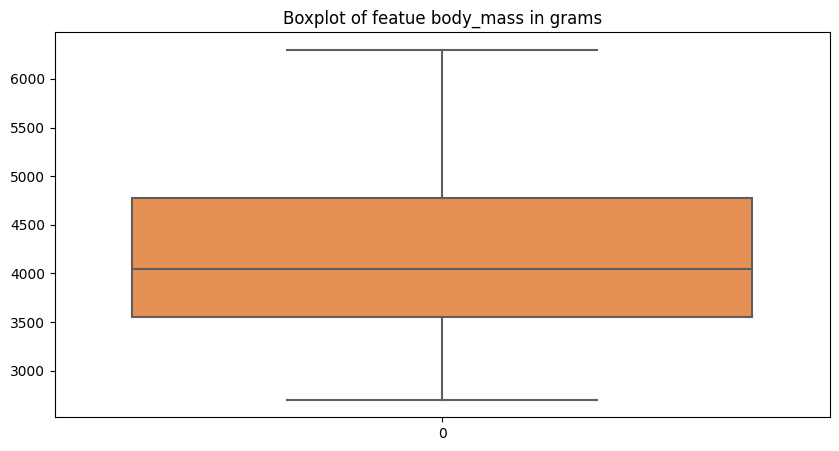

In [22]:
fig,axis=plt.subplots(1,figsize=(10,5))
axis.set_title("Boxplot of featue body_mass in grams")
sns.boxplot(df['body_mass_g'],palette='Oranges',ax=axis)

<AxesSubplot: title={'center': 'Histplot of featue body_mass in grams'}, xlabel='body_mass_g', ylabel='Count'>

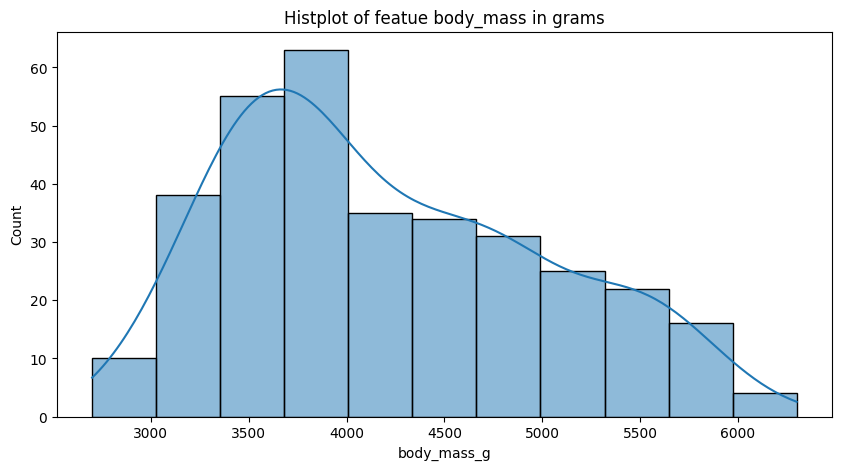

In [24]:
fig,axis=plt.subplots(1,figsize=(10,5))
axis.set_title("Histplot of featue body_mass in grams")
sns.histplot(df['body_mass_g'],kde=True,axes=axis)

<AxesSubplot: xlabel='sex', ylabel='count'>

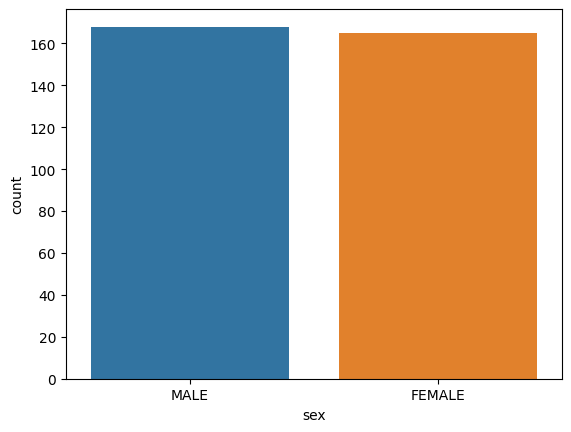

In [25]:
#count plot
sns.countplot(x=df['sex'])

# Bivariate analysis

<AxesSubplot: xlabel='sex', ylabel='body_mass_g'>

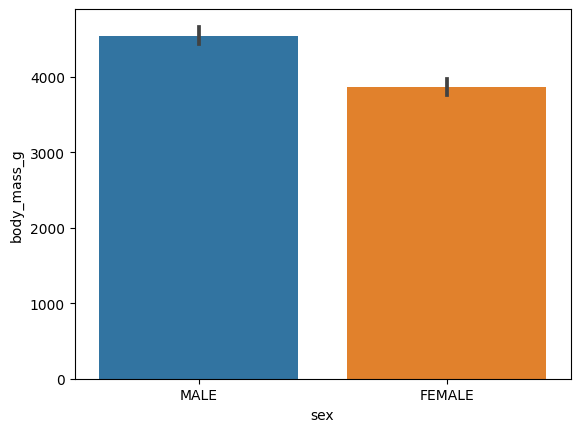

In [26]:
# numerical vs categorical
sns.barplot(x=df.sex,y=df.body_mass_g)

<AxesSubplot: xlabel='island', ylabel='count'>

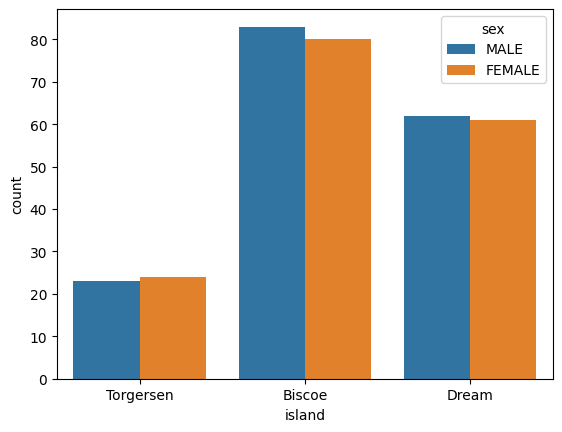

In [27]:
# categorical vs categorical
sns.countplot(x=df.island,hue=df.sex)

<AxesSubplot: xlabel='species', ylabel='count'>

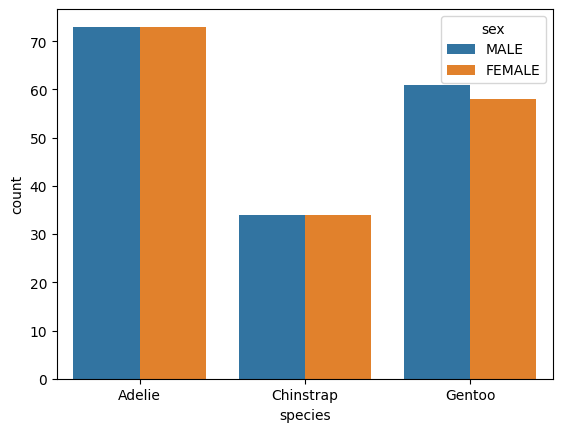

In [28]:
sns.countplot(x=df.species,hue=df.sex)

[Text(0.5, 1.0, 'Culmen depth vs Body mass')]

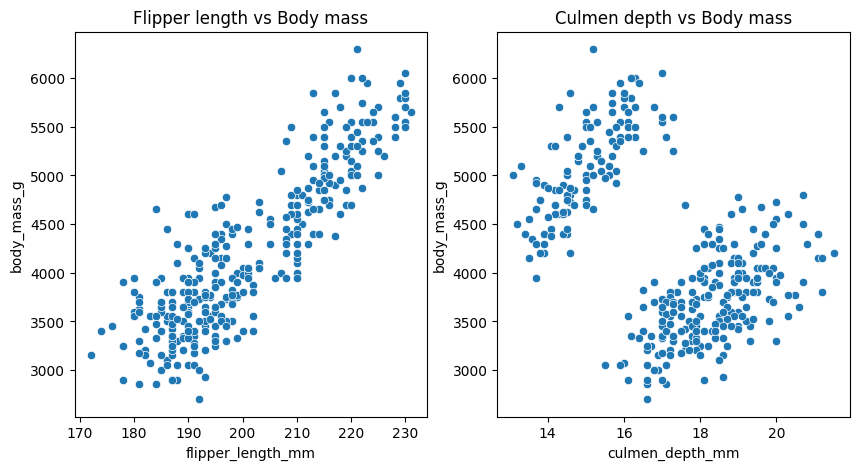

In [32]:
#numerical vs numerical
fig, (ax_scat1, ax_scat2) = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x = df['flipper_length_mm'], y = df['body_mass_g'], ax = ax_scat1).\
    set(title = 'Flipper length vs Body mass')
sns.scatterplot(x = df['culmen_depth_mm'], y = df['body_mass_g'], ax = ax_scat2).\
    set(title = 'Culmen depth vs Body mass')

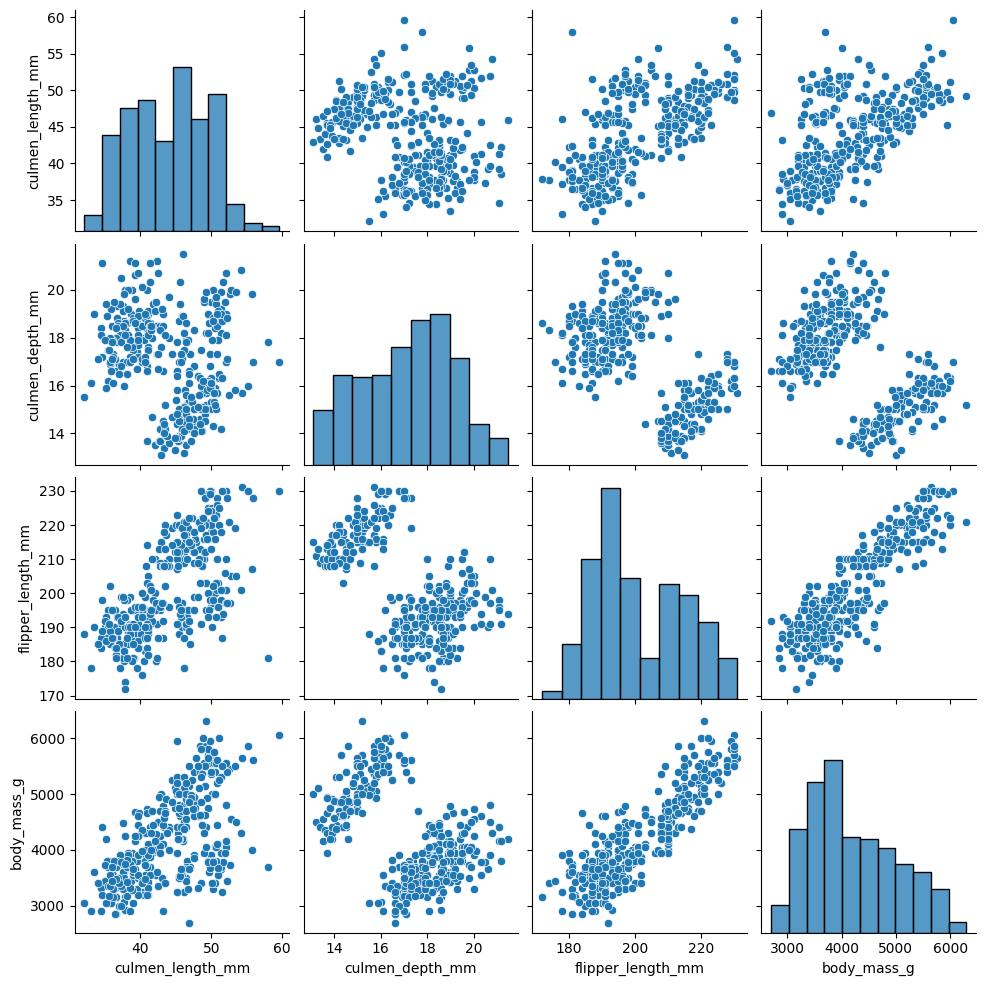

In [46]:
sns.pairplot(df)

# Multivariate analysis

[Text(0.5, 1.0, 'culmen depth vs Body mass')]

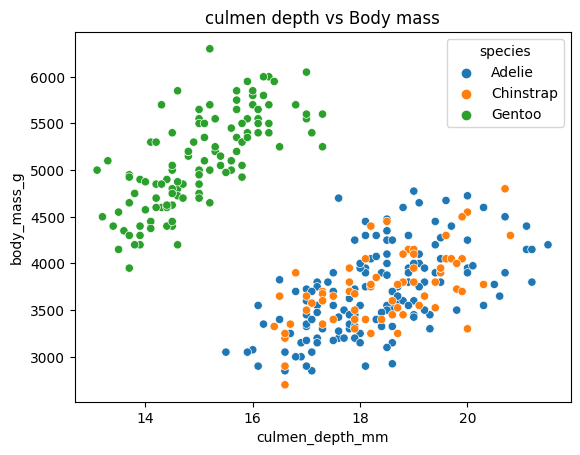

In [43]:
# scatterplot with categorical variable as hue
sns.scatterplot(x=df.culmen_depth_mm,y=df.body_mass_g,hue=df.species).\
set(title='culmen depth vs Body mass')

[Text(0.5, 1.0, 'Flipper length vs Body mass')]

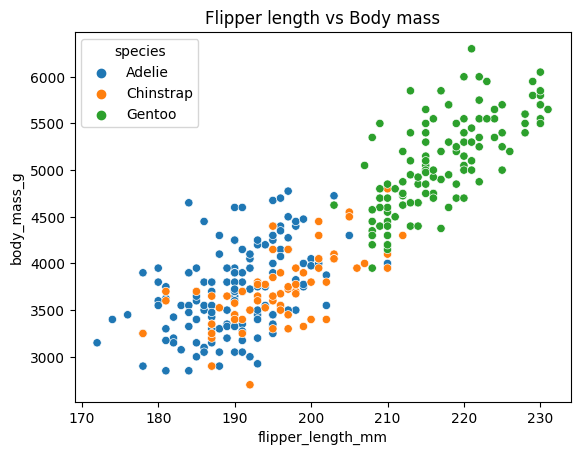

In [42]:
sns.scatterplot(x=df.flipper_length_mm,y=df.body_mass_g,hue=df.species).\
set(title='Flipper length vs Body mass')

[Text(0.5, 1.0, 'Flipper length vs Body mass')]

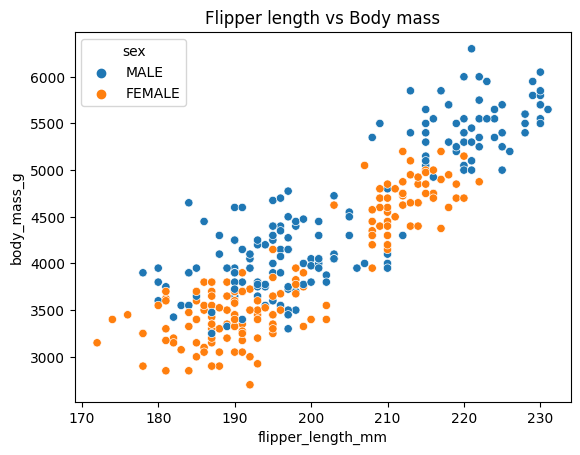

In [41]:
sns.scatterplot(x=df.flipper_length_mm,y=df.body_mass_g,hue=df.sex).\
set(title='Flipper length vs Body mass')

[Text(0.5, 1.0, 'culmen length vs Body mass')]

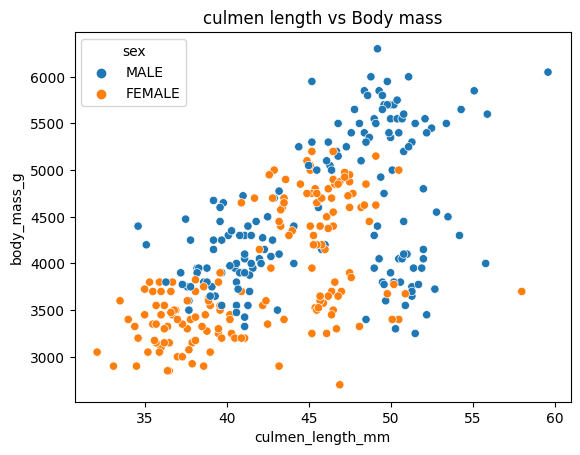

In [40]:
sns.scatterplot(x=df.culmen_length_mm,y=df.body_mass_g,hue=df.sex).\
set(title='culmen length vs Body mass')

In [44]:
df_new=df.drop(['species','sex','island'],axis=1)

<AxesSubplot: >

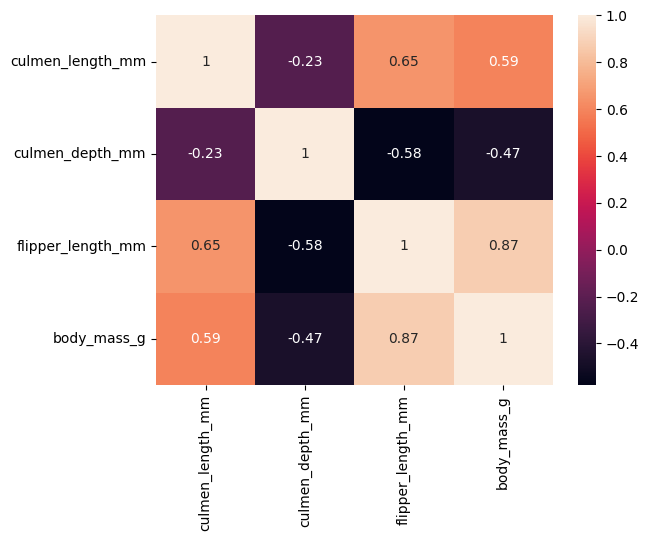

In [45]:
sns.heatmap(df_new.corr(),annot=True)